In [1]:
import sys
sys.path.append("../../../") # Where to find utilssphering
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
evalzoo_combined = pd.read_parquet("../../../data/evalzoo_metrics_combined.paraquet")
evalzoo_combined

,Batch,Metadata_Plate,Metadata_pert_iname,Metadata_reference_or_other,sim_scaled_mean_i_mean_i,sim_scaled_mean_i_median_i,sim_scaled_median_i_mean_i,sim_scaled_median_i_median_i,sim_ranked_relrank_mean_i_mean_i,sim_ranked_relrank_mean_i_median_i,...,sim_retrieval_r_precision_i_median_i,sim_retrieval_average_precision_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_i_nlog10pvalue_median_i,sim_retrieval_average_precision_i_nlog10qvalue_mean_i,Vendor,Magnification,Binning,z_plane,metric_type,Metadata_moa
0,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,A-366,pert,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,...,0.142857,0.333687,0.277463,0.308864,MolDev,10,1,1,ref,None
1,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,A-366,pert,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,...,0.142857,0.333687,0.277463,0.308864,MolDev,10,1,1,ref,None
2,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,ABT-737,pert,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,...,0.571429,2.727806,3.008908,2.293433,MolDev,10,1,1,ref,None
3,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,ABT-737,pert,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,...,0.571429,2.727806,3.008908,2.293433,MolDev,10,1,1,ref,None
4,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,AMG-925,pert,2.544456,2.651249,2.358491,2.587136,0.101935,0.093750,...,0.714286,3.290924,4.000043,2.591954,MolDev,10,1,1,ref,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,0.017382,0.017382,0.017382,0.017382,0.426136,0.426136,...,0.000000,0.406356,0.406356,0.126677,Yokogawa_US,40,1,12,non_rep,pyruvate dehydrogenase kinase inhibitor
24636,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,-0.232787,-0.232787,-0.232787,-0.232787,0.585227,0.585227,...,0.000000,0.308816,0.308816,0.090321,Yokogawa_US,40,1,12,non_rep,smoothened receptor agonist
24637,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,-1.010539,-1.010539,-1.010539,-1.010539,0.869318,0.869318,...,0.000000,0.087009,0.087009,0.055154,Yokogawa_US,40,1,12,non_rep,tricyclic antidepressant
24638,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,-1.011224,-1.011224,-1.011224,-1.011224,0.710227,0.710227,...,0.000000,0.212973,0.212973,0.063732,Yokogawa_US,40,1,12,non_rep,tumor necrosis factor production inhibitor


The pvalue is: 0.873
The pvalue is: 0.8726657710709493


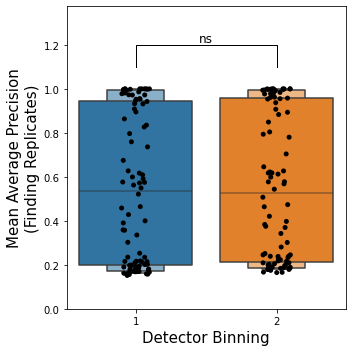

In [3]:
metric_type = "ref"
x = "Binning"
y = "sim_retrieval_average_precision_i_mean_i"

plot_df = evalzoo_combined[
    (evalzoo_combined["Vendor"] == "PE") &
    (~evalzoo_combined["Batch"].str.contains("siteSub"))
]

plot_df = plot_df[plot_df["metric_type"] == metric_type].groupby(["Metadata_pert_iname", x]).mean().reset_index()

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.plot_two_distributions(
    plot_df,
    x,
    y,
    xlabel="Detector Binning",
    ylabel="Mean Average Precision\n(Finding Replicates)",
    ax=ax,
    fig=fig
)

fig.savefig("(S5A)-mAP_replicates-vs-detector_binning.png", dpi=300)

The pvalue is: 0.821
The pvalue is: 0.8214063792265887


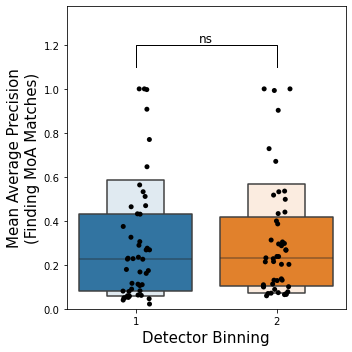

In [4]:
metric_type = "non_rep"
x = "Binning"
group1, group2 = 1, 2
y = "sim_retrieval_average_precision_i_mean_i"

plot_df = evalzoo_combined[
    (evalzoo_combined["Vendor"] == "PE") &
    (~evalzoo_combined["Batch"].str.contains("siteSub"))
]

plot_df = plot_df[plot_df["metric_type"] == metric_type].groupby(["Metadata_moa", x]).mean().reset_index()

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.plot_two_distributions(
    plot_df,
    x,
    y,
    xlabel="Detector Binning",
    ylabel="Mean Average Precision\n(Finding MoA Matches)",
    ax=ax,
    fig=fig
)

fig.savefig("(S5B)-mAP_matches-vs-detector_binning.png", dpi=300)

The pvalue is: 0.746
The pvalue is: 0.7455808926930223


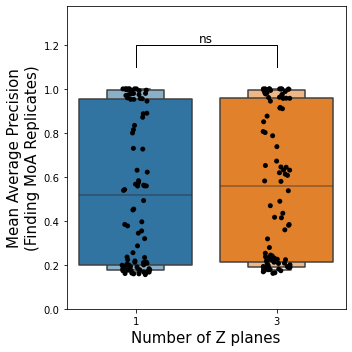

In [5]:
metric_type = "ref"
x = "z_plane"
y = "sim_retrieval_average_precision_i_mean_i"

plot_df = evalzoo_combined[
    (evalzoo_combined["Vendor"] == "PE") &
    (~evalzoo_combined["Batch"].str.contains("siteSub"))
]

plot_df = plot_df[plot_df["metric_type"] == metric_type].groupby(["Metadata_pert_iname", x]).mean().reset_index()

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.plot_two_distributions(
    plot_df,
    x,
    y,
    xlabel="Number of Z planes",
    ylabel="Mean Average Precision\n(Finding MoA Replicates)",
    ax=ax,
    fig=fig
)

fig.savefig("(S5C)-mAP_replicates-vs-z_planes.png", dpi=300)

The pvalue is: 0.744
The pvalue is: 0.7440245155236642


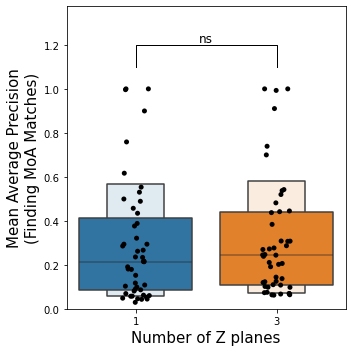

In [6]:
metric_type = "non_rep"
x = "z_plane"
y = "sim_retrieval_average_precision_i_mean_i"

plot_df = evalzoo_combined[
    (evalzoo_combined["Vendor"] == "PE") &
    (~evalzoo_combined["Batch"].str.contains("siteSub"))
]

plot_df = plot_df[plot_df["metric_type"] == metric_type].groupby(["Metadata_moa", x]).mean().reset_index()

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.plot_two_distributions(
    plot_df,
    x,
    y,
    xlabel="Number of Z planes",
    ylabel="Mean Average Precision\n(Finding MoA Matches)",
    ax=ax,
    fig=fig
)

fig.savefig("(S5D)-mAP_matches-vs-z_planes.png", dpi=300)